# NLP - Assignment 1 - Classification of Fake or Real News

##  Varun Raja - MBD April 2019 intake

# <center>Package loading, Data Loading and Sanity Check</center>

In [100]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import string
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import warnings
warnings.filterwarnings("ignore")
#nltk.download('punkt')
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import WhitespaceTokenizer
from nltk.tokenize import MWETokenizer

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
from nltk import pos_tag, pos_tag_sents
#nltk.download('averaged_perceptron_tagger')
from nltk.util import ngrams

In [101]:
# load the training dataset
df_train = pd.read_csv('fake_or_real_news_training.csv')

df_train.shape
df_train.head()

,ID,title,text,label,X1,X2
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,NaN,NaN
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,NaN,NaN
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,NaN,NaN
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,NaN,NaN
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,NaN,NaN


In [102]:
# load the testing dataset
df_test = pd.read_csv('fake_or_real_news_test.csv')

df_test.shape
df_test.head()

,ID,title,text
0,10498,September New Homes Sales Rise——-Back To 1992 ...,September New Homes Sales Rise Back To 1992 Le...
1,2439,Why The Obamacare Doomsday Cult Can't Admit It...,But when Congress debated and passed the Patie...
2,864,"Sanders, Cruz resist pressure after NY losses,...",The Bernie Sanders and Ted Cruz campaigns vowe...
3,4128,Surviving escaped prisoner likely fatigued and...,Police searching for the second of two escaped...
4,662,Clinton and Sanders neck and neck in Californi...,No matter who wins California's 475 delegates ...


We can see that the there are two additional columns in the training dataset, 'X1' and 'X2'. Let's explore why this is so.

In [103]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
ID       3999 non-null int64
title    3999 non-null object
text     3999 non-null object
label    3999 non-null object
X1       33 non-null object
X2       2 non-null object
dtypes: int64(1), object(5)
memory usage: 187.6+ KB
None


We can see that X1 and X2 contains mostly blank or NA values except for 33 non-null values in X1 and 2 non-null values in X2. Let us see which rows these are.

In [104]:
df_train[(df_train.X1.notna()) | (df_train.X2.notna())]

,ID,title,text,label,X1,X2
192,599,Election Day: No Legal Pot In Ohio,Democrats Lose In The South,Election Day: No Legal Pot In Ohio; Democrats ...,REAL,NaN
308,10194,Who rode it best? Jesse Jackson mounts up to f...,Leonardo DiCaprio to the rescue?,Who rode it best? Jesse Jackson mounts up to f...,FAKE,NaN
382,356,Black Hawk crashes off Florida,human remains found,(CNN) Thick fog forced authorities to suspend ...,REAL,NaN
660,2786,Afghanistan: 19 die in air attacks on hospital,U.S. investigating,(CNN) Aerial bombardments blew apart a Doctors...,REAL,NaN
889,3622,Al Qaeda rep says group directed Paris magazin...,US issues travel warning,A member of Al Qaeda's branch in Yemen said Fr...,REAL,NaN
911,7375,Shallow 5.4 magnitude earthquake rattles centr...,shakes buildings in Rome,00 UTC © USGS Map of the earthquake's epicent...,FAKE,NaN
1010,9097,ICE Agent Commits Suicide in NYC,Leaves Note Revealing Gov’t Plans to Round-up...,Email Print After writing a lengthy suicide no...,FAKE,NaN
1043,9203,Political Correctness for Yuengling Brewery,What About Our Opioid Epidemic?,We Are Change \n\nIn today’s political climate...,FAKE,NaN
1218,1602,Poll gives Biden edge over Clinton against GOP...,VP meets with Trumka,A new national poll shows Vice President Biden...,REAL,NaN
1438,4562,Russia begins airstrikes in Syria,U.S. warns of new concerns in conflict,Russian warplanes began airstrikes in Syria on...,REAL,NaN


From the above table we can see that the issue is caused by the data not being correctly entered as there is some spillover from the title cells to the next cells and each cell is to the next column which are the result of these extra X1 and X2 columns. If we analyse these missing values as a total of the dataset, we obtain these results.

In [105]:
df_train.isnull().sum() * 100 / len(df_train)

ID        0.000000
title     0.000000
text      0.000000
label     0.000000
X1       99.174794
X2       99.949987
dtype: float64

As we can see these values are less than 1% of the entire dataset, hence it makes sense to disregard these rows.

In [106]:
# Get names of indexes for which column X1 and X2 has a value
indexNames = df_train[(df_train.X1.notna()) | (df_train.X2.notna())].index

# Drop the rows with those indexes
df_train.drop(indexNames , inplace=True)

Now we the columns X1 and X2 are empty and we can discard them.

In [107]:
df_train = df_train.drop(["X1", "X2"], axis = 1)

In [108]:
# Check to see if there are any more NA values in the train dataset
df_train.isnull().sum() * 100 / len(df_train)
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3966 entries, 0 to 3998
Data columns (total 4 columns):
ID       3966 non-null int64
title    3966 non-null object
text     3966 non-null object
label    3966 non-null object
dtypes: int64(1), object(3)
memory usage: 154.9+ KB
None


We can do the same check for the test dataset as well.

In [109]:
df_test.isnull().sum() * 100 / len(df_test)

ID       0.0
title    0.0
text     0.0
dtype: float64

As there are no more null values we are ready to proceed with further analysis of our dataset.

### Target Variable Analysis

It would be interesting to see the proportion of fake news to real news in our train dataset.

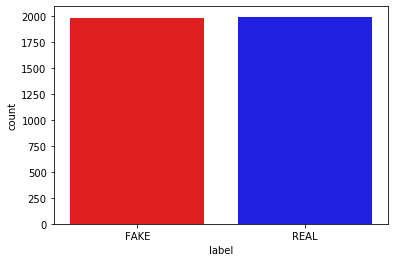

In [110]:
sns.countplot(df_train['label'], palette = ['red', 'blue'])

In [111]:
REAL = len(df_train.loc[df_train['label'] == 'REAL'])/len(df_train)
FAKE = len(df_train.loc[df_train['label'] == 'FAKE'])/len(df_train)
print('REAL:', '%.2f%%' % (REAL*100), 'FAKE:', '%.2f%%' % (FAKE*100))

REAL: 50.18% FAKE: 49.82%


We can observe that the proportion of Real to Fake news in our dataset is almost the same at around 50%. Hence we do not have to worry about any class imbalance in this case.

# <center> Data Split and Base Models </center>

Now we can proceed to run a baseline model on the text column as a feature initially and then see if we can improve it further by doing more preprocessing. We shall go ahead and create a split of a train and test set using an 80:20 split

In [112]:
# Set y 
y = df_train.label 

# Drop the `label` column
df_train.drop("label", axis=1)

# Make training and test sets 
X_train, X_test, y_train, y_test = train_test_split(df_train['text'], y, test_size=0.20, random_state=23)

We shall use the CountVectorizer to create a matrix of token counts of the words in the text column. The method also includes basic preprocessing for lowercasing all words so that they may be more easily compared as well as removing stopwords such as it, the, a and other frequently repeating words that provide no discriminative value. 

In [113]:
# We first initialize the `count_vectorizer and apply the preprocessing of stop words removal and lowercasing each word
count_vectorizer = CountVectorizer(stop_words='english',lowercase=True)

# Fit and transform the training data 
count_train = count_vectorizer.fit_transform(X_train) 

# Transform the test set 
count_test = count_vectorizer.transform(X_test)

Let us try a Naive Bayes classifer as a first choice base model. We are going to choose the Multinomial Naive Bayes because this method cares about counts for multiple features that do occur, which makes sense in our case as we could have a lot of features or words that repeat many times. It means that the Multinomial NB will classify a document based on the counts it finds of multiple keywords which is what we would like as certain keywords might repeat more in Fake or Real news as opposed to others.

accuracy:   0.885


<Figure size 432x288 with 0 Axes>

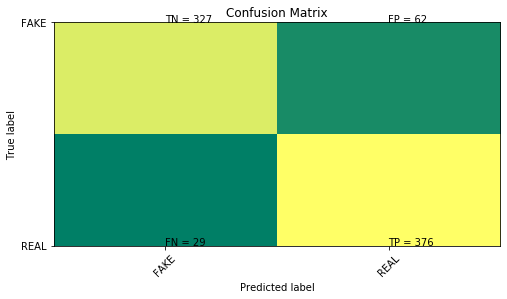

In [114]:
# Training Naive Bayes (NB) classifier on training data and CountVectorizer.
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

# Confusion matrix plot to check how well we predicted each class
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])

plt.clf()
plt.figure(figsize=(8,5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.summer)
classNames = ['FAKE','REAL']
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

We are able to achieve a decent accuracy of 88.5% with this base model. Let us try running some other classifiers such as the random forest classifier, logistic regression as well as an SVM with the same features.

accuracy:  0.904


<Figure size 432x288 with 0 Axes>

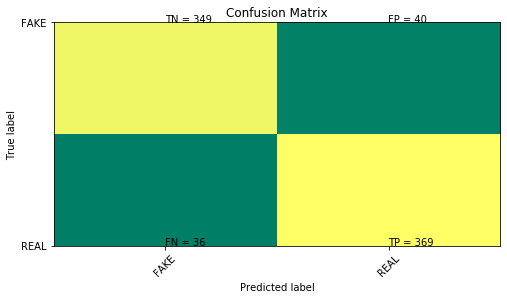

In [115]:
# Training Random Forest Classifier on training data and CountVectorizer.
 
rf = RandomForestClassifier(n_estimators = 500)

rf.fit(count_train, y_train)

rf.pred = rf.predict(count_test)

## Check the accuracy

print ("accuracy:  %0.3f" % accuracy_score(y_test, rf.pred))

# Confusion matrix plot to check how well we predicted each class
cm = confusion_matrix(y_test, rf.pred, labels=['FAKE', 'REAL'])

plt.clf()
plt.figure(figsize=(8,5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.summer)
classNames = ['FAKE','REAL']
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

accuracy:   0.848


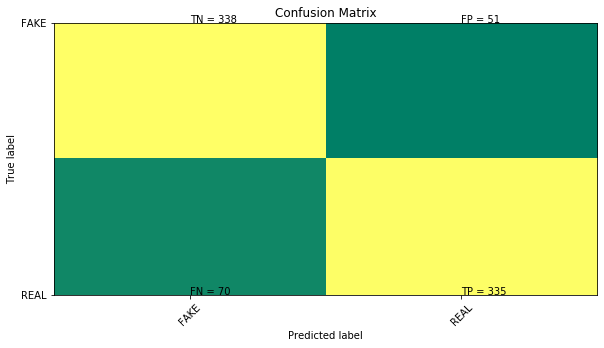

In [116]:
# Training Logistic Regression - and calculating its performance
lgr = LogisticRegression(n_jobs=1, C=1e5)
lgr.fit(count_train, y_train)
pred_lgr = lgr.predict(count_test)

print("accuracy:   %0.3f" % accuracy_score(y_test, pred_lgr))

# Confusion matrix plot to check how well we predicted each class
cm = confusion_matrix(y_test, pred_lgr, labels=['FAKE', 'REAL'])
plt.figure(figsize=(10,5))
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.summer)
classNames = ['FAKE','REAL']
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

accuracy:   0.914


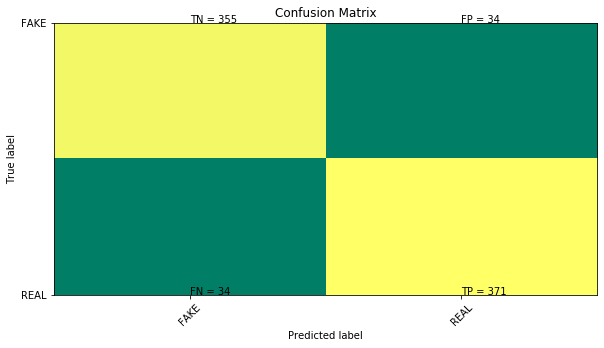

In [117]:
# Training Support Vector Machines - SVM and calculating its performance
svm = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=23)
svm.fit(count_train, y_train)
pred_svm = svm.predict(count_test)

print("accuracy:   %0.3f" % accuracy_score(y_test, pred_svm))

# Confusion matrix plot to check how well we predicted each class
cm = confusion_matrix(y_test, pred_svm, labels=['FAKE', 'REAL'])
plt.figure(figsize=(10,5))
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.summer)
classNames = ['FAKE','REAL']
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

From the two additional model we ran above we can see that an SVM model yields the best accuracy of 91.4% 

Using just the text column as a feature in the base models we were able to achieve decent accuracy scores. However, let us try some additional preprocessing and see if we are able to improve our scores even higher by also including the title feature.

# <center> Preprocessing and Additional Feature Tests </center>

Let's see how we perform with just the title variable as a feature instead of text in our model, let's use the SVM base model along with the additional step of performing a TF-IDF transformer on the title feature. This method gives more weight to words that are more rare and less frequently repeating. It differs from the CountVectorizer which uses a simple count of the words with equal weights in each document.

In [118]:
#TITLE
#Obtaining the title variable and splitting our dataset.
# Set `y` 
y = df_train.label 

# Drop the `label` column
df_train.drop("label", axis=1)

# Make training and test sets 
X_train, X_test, y_train, y_test = train_test_split(df_train['title'], y, test_size=0.20, random_state=53)

In [119]:
#TF-IDF

# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

Let us now test our preprocessing on the title feature using the model that had the best score in our earlier test - the SVM. 

In [120]:
# Training Support Vector Machines - SVM and calculating its performance on the 'Title' feature
svm = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=23)
svm.fit(tfidf_train, y_train)
pred_svm = svm.predict(tfidf_test)

print("accuracy:   %0.3f" % accuracy_score(y_test, pred_svm))

accuracy:   0.804


The score is significantly less than our model that was tested earlier on just the text feature (column), let us now try combining both the text and title features and then test the model's performance.

In [121]:
# Combination of both the text and title as well as preprocessing that includes the CountVectorizer and TF-IDF methodology

df_train['title_text'] = df_train.title + ' ' + df_train.text

# Set `y` 
y = df_train.label 

# Drop the `label` column
df_train.drop("label", axis=1)

# Make training and test sets 
X_train, X_test, y_train, y_test = train_test_split(df_train['title_text'], y, test_size=0.20, random_state=53)

# Using a pipeline to streamline the code
text_svm_cl = Pipeline([('vect', CountVectorizer(stop_words='english',lowercase=True)), ('tfidf', TfidfTransformer()),
                         ('svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=23))])

text_svm_cl = text_svm_cl.fit(X_train, y_train)

text_svm_pred = text_svm_cl.predict(X_test)

print("accuracy:   %0.3f" % accuracy_score(y_test, text_svm_pred))


accuracy:   0.908


With a combination of these features and processing we are able to obtain an accuracy score of 90.8% which is slightly less than before but a good base to build upon.

### Word Tokenization

Let's start with tokenization of the words for our model. We are going to try 4 different tokenization methods:

1) word_tokenize: THis method tokenizes words based on punctuation other than full-stops.

2) WhitespaceTokenizer: This method tokenizes words on white spaces, blanks or tabs within the text

3) MWETokenizer: This method tokenizes words containing multi-word expressions into single tokens

4) WordPunctTokenizer: This method tokenizes words based on regular expressions into a sequence of regular alphabetic and non-alphabetic characters 

In [122]:
#Tokenization

ws = WhitespaceTokenizer()
mw = MWETokenizer()
wp = WordPunctTokenizer()

#Creating different columns for each tokenization method

df_train['Word_token'] = df_train.apply(lambda row: word_tokenize(row['title_text']), axis=1)
df_train['WP_tokens'] = df_train.apply(lambda row: wp.tokenize(row['title_text']), axis=1)
df_train['WS_tokens'] = df_train.apply(lambda row: ws.tokenize(row['title_text']), axis=1)
df_train['MW_tokens'] = df_train.apply(lambda row: mw.tokenize(row['title_text'].split()), axis=1)
df_train.head()



,ID,title,text,label,title_text,Word_token,WP_tokens,WS_tokens,MW_tokens
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...,"[You, Can, Smell, Hillary, ’, s, Fear, Daniel,...","[You, Can, Smell, Hillary, ’, s, Fear, Daniel,...","[You, Can, Smell, Hillary’s, Fear, Daniel, Gre...","[You, Can, Smell, Hillary’s, Fear, Daniel, Gre..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...,"[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit..."
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy U....,"[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy..."
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...,"[Bernie, supporters, on, Twitter, erupt, in, a...","[Bernie, supporters, on, Twitter, erupt, in, a...","[Bernie, supporters, on, Twitter, erupt, in, a...","[Bernie, supporters, on, Twitter, erupt, in, a..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York: Why This Primary Matte...,"[The, Battle, of, New, York, :, Why, This, Pri...","[The, Battle, of, New, York, :, Why, This, Pri...","[The, Battle, of, New, York:, Why, This, Prima...","[The, Battle, of, New, York:, Why, This, Prima..."


Now that we have tokenized each word to be used a seperate feature, let us now proceed to do the stemming and then the lemmatization of each word. 

### Stemming

Stemming is technique that removes any affixes of words and obtains the root of each word, it could prove especially useful in the classification of text. We are going to use the English stemmer available as part of the Snowball Stemmer function which has proven to be better at finding the stem of certain words than the orignal 'Porter' stemmer.

In [123]:
#Running Stemming method over each of the word tokenisation columns (features) created earlier

stm = SnowballStemmer('english', ignore_stopwords=True)

def stem_list_1(row):
    my_list = row['Word_token']
    stemmed_list = [stm.stem(word) for word in my_list]
    return (stemmed_list)
df_train['Word_token_stem'] = df_train.apply(stem_list_1, axis=1)

def stem_list_2(row):
    my_list = row['WP_tokens']
    stemmed_list = [stm.stem(word) for word in my_list]
    return (stemmed_list)
df_train['WP_tokens_stem'] = df_train.apply(stem_list_2, axis=1)

def stem_list_3(row):
    my_list = row['WS_tokens']
    stemmed_list = [stm.stem(word) for word in my_list]
    return (stemmed_list)
df_train['WS_tokens_stem'] = df_train.apply(stem_list_3, axis=1)

def stem_list_4(row):
    my_list = row['MW_tokens']
    stemmed_list = [stm.stem(word) for word in my_list]
    return (stemmed_list)
df_train['MW_tokens_stem'] = df_train.apply(stem_list_4, axis=1)

In [124]:
df_train.head()

,ID,title,text,label,title_text,Word_token,WP_tokens,WS_tokens,MW_tokens,Word_token_stem,WP_tokens_stem,WS_tokens_stem,MW_tokens_stem
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...,"[You, Can, Smell, Hillary, ’, s, Fear, Daniel,...","[You, Can, Smell, Hillary, ’, s, Fear, Daniel,...","[You, Can, Smell, Hillary’s, Fear, Daniel, Gre...","[You, Can, Smell, Hillary’s, Fear, Daniel, Gre...","[you, can, smell, hillari, ’, s, fear, daniel,...","[you, can, smell, hillari, ’, s, fear, daniel,...","[you, can, smell, hillari, fear, daniel, green...","[you, can, smell, hillari, fear, daniel, green..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...,"[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[watch, the, exact, moment, paul, ryan, commit...","[watch, the, exact, moment, paul, ryan, commit...","[watch, the, exact, moment, paul, ryan, commit...","[watch, the, exact, moment, paul, ryan, commit..."
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy U....,"[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy...","[kerri, to, go, to, pari, in, gestur, of, symp...","[kerri, to, go, to, pari, in, gestur, of, symp...","[kerri, to, go, to, pari, in, gestur, of, symp...","[kerri, to, go, to, pari, in, gestur, of, symp..."
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...,"[Bernie, supporters, on, Twitter, erupt, in, a...","[Bernie, supporters, on, Twitter, erupt, in, a...","[Bernie, supporters, on, Twitter, erupt, in, a...","[Bernie, supporters, on, Twitter, erupt, in, a...","[berni, support, on, twitter, erupt, in, anger...","[berni, support, on, twitter, erupt, in, anger...","[berni, support, on, twitter, erupt, in, anger...","[berni, support, on, twitter, erupt, in, anger..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York: Why This Primary Matte...,"[The, Battle, of, New, York, :, Why, This, Pri...","[The, Battle, of, New, York, :, Why, This, Pri...","[The, Battle, of, New, York:, Why, This, Prima...","[The, Battle, of, New, York:, Why, This, Prima...","[the, battl, of, new, york, :, why, this, prim...","[the, battl, of, new, york, :, why, this, prim...","[the, battl, of, new, york:, why, this, primar...","[the, battl, of, new, york:, why, this, primar..."


### Lemmatization 

Now let us proceed to perform lemmatization on the set of tokenized words we created earlier. This is another technique used to find the roots of words considering it's correct root and context in the english language, which might prove more useful than just stemming.

In [125]:
# Creating functions to run Lemmatization over each of the word tokens we created earlier

lemma = WordNetLemmatizer()

def lemm_list_1(row):
    my_list = row['Word_token']
    lemm_list = [lemma.lemmatize(word) for word in my_list]
    return (lemm_list)
df_train['Word_token_lemma'] = df_train.apply(lemm_list_1, axis=1)

def lemm_list_2(row):
    my_list = row['WP_tokens']
    lemm_list = [lemma.lemmatize(word) for word in my_list]
    return (lemm_list)
df_train['WP_tokens_lemma'] = df_train.apply(lemm_list_2, axis=1)

def lemm_list_3(row):
    my_list = row['WS_tokens']
    lemm_list = [lemma.lemmatize(word) for word in my_list]
    return (lemm_list)
df_train['WS_tokens_lemma'] = df_train.apply(lemm_list_3, axis=1)

def lemm_list_4(row):
    my_list = row['MW_tokens']
    lemm_list = [lemma.lemmatize(word) for word in my_list]
    return (lemm_list)
df_train['MW_tokens_lemma'] = df_train.apply(lemm_list_3, axis=1)

df_train.head()

,ID,title,text,label,title_text,Word_token,WP_tokens,WS_tokens,MW_tokens,Word_token_stem,WP_tokens_stem,WS_tokens_stem,MW_tokens_stem,Word_token_lemma,WP_tokens_lemma,WS_tokens_lemma,MW_tokens_lemma
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...,"[You, Can, Smell, Hillary, ’, s, Fear, Daniel,...","[You, Can, Smell, Hillary, ’, s, Fear, Daniel,...","[You, Can, Smell, Hillary’s, Fear, Daniel, Gre...","[You, Can, Smell, Hillary’s, Fear, Daniel, Gre...","[you, can, smell, hillari, ’, s, fear, daniel,...","[you, can, smell, hillari, ’, s, fear, daniel,...","[you, can, smell, hillari, fear, daniel, green...","[you, can, smell, hillari, fear, daniel, green...","[You, Can, Smell, Hillary, ’, s, Fear, Daniel,...","[You, Can, Smell, Hillary, ’, s, Fear, Daniel,...","[You, Can, Smell, Hillary’s, Fear, Daniel, Gre...","[You, Can, Smell, Hillary’s, Fear, Daniel, Gre..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...,"[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[watch, the, exact, moment, paul, ryan, commit...","[watch, the, exact, moment, paul, ryan, commit...","[watch, the, exact, moment, paul, ryan, commit...","[watch, the, exact, moment, paul, ryan, commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit..."
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy U....,"[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy...","[kerri, to, go, to, pari, in, gestur, of, symp...","[kerri, to, go, to, pari, in, gestur, of, symp...","[kerri, to, go, to, pari, in, gestur, of, symp...","[kerri, to, go, to, pari, in, gestur, of, symp...","[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy..."
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...,"[Bernie, supporters, on, Twitter, erupt, in, a...","[Bernie, supporters, on, Twitter, erupt, in, a...","[Bernie, supporters, on, Twitter, erupt, in, a...","[Bernie, supporters, on, Twitter, erupt, in, a...","[berni, support, on, twitter, erupt, in, anger...","[berni, support, on, twitter, erupt, in, anger...","[berni, support, on, twitter, erupt, in, anger...","[berni, support, on, twitter, erupt, in, anger...","[Bernie, supporter, on, Twitter, erupt, in, an...","[Bernie, supporter, on, Twitter, erupt, in, an...","[Bernie, supporter, on, Twitter, erupt, in, an...","[Bernie, supporter, on, Twitter, erupt, in, an..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York: Why This Primary Matte...,"[The, Battle, of, New, York, :, Why, This, Pri...","[The, Battle, of, New, York, :, Why, This, Pri...","[The, Battle, of, New, York:, Why, This, Prima...","[The, Battle, of, New, York:, Why, This, Prima...","[the, battl, of, new, york, :, why, this, prim...","[the, battl, of, new, york, :, why, this, prim...","[the, battl, of, new, york:, why, this, primar...","[the, battl, of, new, york:, why, this, primar...","[The, Battle, of, New, York, :, Why, This, Pri...","[The, Battle, of, New, York, :, Why, This, Pri...

Let us now evaluate each feature created as a result of the stemming and lemmatization and check the improvement on the accuracy of our results

In [126]:
# Creating a function to calculate the accuracy of an SVM model defined in a pipeline
def model_acc(y,X_train, X_test, y_train, y_test):
    
    svm_test = Pipeline([('vect', CountVectorizer(stop_words='english',lowercase=True)), ('tfidf', TfidfTransformer()), ('svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42))])

    svm_test = svm_test.fit(X_train.astype(str), y_train)
    svm_pred = svm_test.predict(X_test.astype(str))
    accuracy = accuracy_score(y_test, svm_pred)
    return accuracy

#PIPELINE WITH SVM
def svm_pipeline(df_train, cols):
    # Set `y` 
    y = df_train.label 

    # Drop the `label` column
    df_train.drop("label", axis=1)
    # using a for loop to run over each of the necessary columns in our dataset
    for col in cols:
        # Make training and test sets 
        X_train, X_test, y_train, y_test = train_test_split(df_train[col], y, test_size=0.20, random_state=23)
        accuracy = model_acc(y,X_train, X_test, y_train, y_test)
        print('Accuracy ({}): {:0.5f} '.format(col,accuracy), end='\n')
        
cols = ['title_text','Word_token', 'WP_tokens', 'WS_tokens', 'MW_tokens', 'Word_token_stem', 'WP_tokens_stem', 'WS_tokens_stem', 'MW_tokens_stem', 'Word_token_lemma', 'WP_tokens_lemma', 'WS_tokens_lemma', 'MW_tokens_lemma']
svm_pipeline(df_train, cols)

Accuracy (title_text): 0.90806 
Accuracy (Word_token): 0.91058 
Accuracy (WP_tokens): 0.91058 
Accuracy (WS_tokens): 0.91184 
Accuracy (MW_tokens): 0.91184 
Accuracy (Word_token_stem): 0.91814 
Accuracy (WP_tokens_stem): 0.91310 
Accuracy (WS_tokens_stem): 0.91184 
Accuracy (MW_tokens_stem): 0.91184 
Accuracy (Word_token_lemma): 0.91310 
Accuracy (WP_tokens_lemma): 0.91058 
Accuracy (WS_tokens_lemma): 0.91310 
Accuracy (MW_tokens_lemma): 0.91310 


We can see some improvement from our original results, let us try a random forest test pipeline for same features.

In [127]:
# Creating a function to calculate the accuracy of an random forest model defined in a pipeline
def rf_acc(y,X_train, X_test, y_train, y_test):
    
    rf_test = Pipeline([('vect', CountVectorizer(stop_words='english',lowercase=True)), ('tfidf', TfidfTransformer()), ('rf', RandomForestClassifier(n_estimators = 500))])

    rf_test = rf_test.fit(X_train.astype(str), y_train)
    rf_pred = rf_test.predict(X_test.astype(str))
    accuracy = accuracy_score(y_test, rf_pred)
    return accuracy

#PIPELINE WITH Random Forest Classifier
def rf_pipeline(df_train, cols):
    # Set `y` 
    y = df_train.label 

    # Drop the `label` column
    df_train.drop("label", axis=1)

    for col in cols:
        # Make training and test sets 
        X_train, X_test, y_train, y_test = train_test_split(df_train[col], y, test_size=0.20, random_state=23)
        accuracy = rf_acc(y,X_train, X_test, y_train, y_test)
        print('Accuracy ({}): {:0.5f} '.format(col,accuracy), end='\n')
        
cols = ['title_text','Word_token', 'WP_tokens', 'WS_tokens', 'MW_tokens', 'Word_token_stem', 'WP_tokens_stem', 'WS_tokens_stem', 'MW_tokens_stem', 'Word_token_lemma', 'WP_tokens_lemma', 'WS_tokens_lemma', 'MW_tokens_lemma']
rf_pipeline(df_train, cols)

Accuracy (title_text): 0.90050 
Accuracy (Word_token): 0.90050 
Accuracy (WP_tokens): 0.90554 
Accuracy (WS_tokens): 0.90554 
Accuracy (MW_tokens): 0.90680 
Accuracy (Word_token_stem): 0.89295 
Accuracy (WP_tokens_stem): 0.89169 
Accuracy (WS_tokens_stem): 0.90554 
Accuracy (MW_tokens_stem): 0.89924 
Accuracy (Word_token_lemma): 0.90176 
Accuracy (WP_tokens_lemma): 0.89798 
Accuracy (WS_tokens_lemma): 0.90428 
Accuracy (MW_tokens_lemma): 0.90050 


From these results, we can see that the Word_token_stem feature is giving us the best accuracy of 91.8 using an SVM classifer algorithm. Hence let us use this feature for further processing which could improve our results. Let us try Parts of Speech (POS) tagging and the removal of special characters from our created features.

In [128]:
# Removing special characters

df_train['text_no_spl'] = df_train.title_text.replace('[-()\"#/@;:<>{}`+=~|.!?,\n’“”%$—]', '')

# Running the word tokenizer on the new column created above to obtain word tokens

df_train['text_no_spl_Word_token'] = df_train.apply(lambda row: word_tokenize(row['text_no_spl']), axis=1)

# Running lemmatization on the tokens created in the previous step

lemma = WordNetLemmatizer()

def lemm_list_5(row):
    my_list = row['text_no_spl_Word_token']
    lemm_list = [lemma.lemmatize(word) for word in my_list]
    return (lemm_list)
df_train['text_no_spl_Word_token_lemma'] = df_train.apply(lemm_list_5, axis=1)
df_train.head()

,ID,title,text,label,title_text,Word_token,WP_tokens,WS_tokens,MW_tokens,Word_token_stem,WP_tokens_stem,WS_tokens_stem,MW_tokens_stem,Word_token_lemma,WP_tokens_lemma,WS_tokens_lemma,MW_tokens_lemma,text_no_spl,text_no_spl_Word_token,text_no_spl_Word_token_lemma
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...,"[You, Can, Smell, Hillary, ’, s, Fear, Daniel,...","[You, Can, Smell, Hillary, ’, s, Fear, Daniel,...","[You, Can, Smell, Hillary’s, Fear, Daniel, Gre...","[You, Can, Smell, Hillary’s, Fear, Daniel, Gre...","[you, can, smell, hillari, ’, s, fear, daniel,...","[you, can, smell, hillari, ’, s, fear, daniel,...","[you, can, smell, hillari, fear, daniel, green...","[you, can, smell, hillari, fear, daniel, green...","[You, Can, Smell, Hillary, ’, s, Fear, Daniel,...","[You, Can, Smell, Hillary, ’, s, Fear, Daniel,...","[You, Can, Smell, Hillary’s, Fear, Daniel, Gre...","[You, Can, Smell, Hillary’s, Fear, Daniel, Gre...",You Can Smell Hillary’s Fear Daniel Greenfield...,"[You, Can, Smell, Hillary, ’, s, Fear, Daniel,...","[You, Can, Smell, Hillary, ’, s, Fear, Daniel,..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...,"[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[watch, the, exact, moment, paul, ryan, commit...","[watch, the, exact, moment, paul, ryan, commit...","[watch, the, exact, moment, paul, ryan, commit...","[watch, the, exact, moment, paul, ryan, commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...",Watch The Exact Moment Paul Ryan Committed Pol...,"[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit..."
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy U....,"[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy...","[kerri, to, go, to, pari, in, gestur, of, symp...","[kerri, to, go, to, pari, in, gestur, of, symp...","[kerri, to, go, to, pari, in, gestur, of, symp...","[kerri, to, go, to, pari, in, gestur, of, symp...","[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy...",Kerry to go to Paris in gesture of sympathy U....,"[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy..."
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...,"[Bernie, supporters, on, Twitter, erupt, in, a...","[Bernie, supporters, on, Twitter, erupt, in, a...","[Bernie, supporters, on, Twitter, erupt, in, a...","[Bernie, supporters, on, Twitter, erupt, in, a...","[berni, support, on, twitter, erupt, in, anger...","[berni, support, on, twitter, erupt, in, anger...","[berni, support, on, twitter, erupt, in, anger...","[berni, support, on, twitter, erupt, in, anger...","[Bernie, supporter, on, Twitter, erupt, in, an...","[Bernie, supporter, on, Twitter, erupt, in, an...","[Bernie, supporter, on, Twitter, erupt, in, an...","[Bernie, supporter, on, Twitter, erupt, in, an...",Bernie supporters on Twitter erupt in anger ag...,"[Bernie, supporters, on, Twitter, erupt, in, a...","[Bernie, supporter, on, Twitter, erupt, in, an...

### Parts of Speech (POS) Tagging

Let us now perform Parts of Speech tagging to the our transformed features. This technique identifies which parts of the text can be identified as nouns or verbs and other such sentence objects. This should help us classify our text better as it introduces additional certainty to the features we wish to classify.

In [129]:
#POS-tagging on the previous feature created
df_train['POS_tag'] = df_train['text_no_spl_Word_token_lemma'].apply(nltk.tag.pos_tag)

#Using N-grams to create a context based tagger for bigrams, trigrams and quadgrams i.e 2, 3 and 4 context based situations
df_train['Bigrams'] = df_train['text_no_spl_Word_token_lemma'].apply(lambda row: list(nltk.ngrams(row, 2)))
df_train['Trigrams'] = df_train['text_no_spl_Word_token_lemma'].apply(lambda row: list(nltk.ngrams(row, 3)))
df_train['Quadgrams'] = df_train['text_no_spl_Word_token_lemma'].apply(lambda row: list(nltk.ngrams(row, 4)))

In [130]:
df_train.head()

,ID,title,text,label,title_text,Word_token,WP_tokens,WS_tokens,MW_tokens,Word_token_stem,...,WP_tokens_lemma,WS_tokens_lemma,MW_tokens_lemma,text_no_spl,text_no_spl_Word_token,text_no_spl_Word_token_lemma,POS_tag,Bigrams,Trigrams,Quadgrams
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...,"[You, Can, Smell, Hillary, ’, s, Fear, Daniel,...","[You, Can, Smell, Hillary, ’, s, Fear, Daniel,...","[You, Can, Smell, Hillary’s, Fear, Daniel, Gre...","[You, Can, Smell, Hillary’s, Fear, Daniel, Gre...","[you, can, smell, hillari, ’, s, fear, daniel,...",...,"[You, Can, Smell, Hillary, ’, s, Fear, Daniel,...","[You, Can, Smell, Hillary’s, Fear, Daniel, Gre...","[You, Can, Smell, Hillary’s, Fear, Daniel, Gre...",You Can Smell Hillary’s Fear Daniel Greenfield...,"[You, Can, Smell, Hillary, ’, s, Fear, Daniel,...","[You, Can, Smell, Hillary, ’, s, Fear, Daniel,...","[(You, PRP), (Can, MD), (Smell, VB), (Hillary,...","[(You, Can), (Can, Smell), (Smell, Hillary), (...","[(You, Can, Smell), (Can, Smell, Hillary), (Sm...","[(You, Can, Smell, Hillary), (Can, Smell, Hill..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...,"[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[watch, the, exact, moment, paul, ryan, commit...",...,"[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...",Watch The Exact Moment Paul Ryan Committed Pol...,"[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[(Watch, VB), (The, DT), (Exact, NNP), (Moment...","[(Watch, The), (The, Exact), (Exact, Moment), ...","[(Watch, The, Exact), (The, Exact, Moment), (E...","[(Watch, The, Exact, Moment), (The, Exact, Mom..."
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy U....,"[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy...","[kerri, to, go, to, pari, in, gestur, of, symp...",...,"[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy...",Kerry to go to Paris in gesture of sympathy U....,"[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy...","[(Kerry, NNP), (to, TO), (go, VB), (to, TO), (...","[(Kerry, to), (to, go), (go, to), (to, Paris),...","[(Kerry, to, go), (to, go, to), (go, to, Paris...","[(Kerry, to, go, to), (to, go, to, Paris), (go..."
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...,"[Bernie, supporters, on, Twitter, erupt, in, a...","[Bernie, supporters, on, Twitter, erupt, in, a...","[Bernie, supporters, on, Twitter, erupt, in, a...","[Bernie, supporters, on, Twitter, erupt, in, a...","[berni, support, on, twitter, erupt, in, anger...",...,"[Bernie, supporter, on, Twitter, erupt, in, an...","[Bernie, supporter, on, Twitter, erupt, in, an...","[Bernie, supporter, on, Twitter, erupt, in, an...",Bernie supporters on Twitter erupt in anger ag...,"[Bernie, supporters, on, Twitter, erupt, in, a...","[Bernie, supporter, on, Twitter, erupt, in, an...","[(Bernie, NNP), (supporter, NN), (on, IN), (Tw...","[(Bernie, supporter), (supporter, on), (on, Tw...","[(Bernie, supporter, on), (supporter, on, Twit...","[(Bernie, supporter, on, Twitter), (supporter,..."
4,875

# <center> Final Model Test </center>


Now that we have created these features, it is time to run tests for a final time to see how much better we are able to improve the results. The models going to be tested include:

1) SVM Classifier

2) Logistic Regression Classifier

3) Multinomial Naive Bayes Classifer

4) Random Forest Classifier

In [131]:
# Creating a function to calculate the accuracy of an SVM model defined in a pipeline
def model_acc(y,X_train, X_test, y_train, y_test):
    
    svm_test = Pipeline([('vect', CountVectorizer(stop_words='english',lowercase=True)), ('tfidf', TfidfTransformer()), ('svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42))])

    svm_test = svm_test.fit(X_train.astype(str), y_train)
    svm_pred = svm_test.predict(X_test.astype(str))
    accuracy = accuracy_score(y_test, svm_pred)
    return accuracy

#PIPELINE WITH SVM
def svm_pipeline(df_train, cols):
    # Set `y` 
    y = df_train.label 

    # Drop the `label` column
    df_train.drop("label", axis=1)

    for col in cols:
        # Make training and test sets 
        X_train, X_test, y_train, y_test = train_test_split(df_train[col], y, test_size=0.20, random_state=23)
        accuracy = model_acc(y,X_train, X_test, y_train, y_test)
        print('Accuracy ({}): {:0.5f} '.format(col,accuracy), end='\n')
        
cols = ['title_text','Word_token', 'WP_tokens', 'WS_tokens', 'MW_tokens', 'Word_token_stem', 'WP_tokens_stem', 'WS_tokens_stem', 'MW_tokens_stem', 'Word_token_lemma', 'WP_tokens_lemma', 'WS_tokens_lemma', 'MW_tokens_lemma', 'text_no_spl', 'text_no_spl_Word_token', 'text_no_spl_Word_token_lemma', 'POS_tag', 'Bigrams', 'Trigrams', 'Quadgrams']
svm_pipeline(df_train, cols)

Accuracy (title_text): 0.90806 
Accuracy (Word_token): 0.91058 
Accuracy (WP_tokens): 0.91058 
Accuracy (WS_tokens): 0.91184 
Accuracy (MW_tokens): 0.91184 
Accuracy (Word_token_stem): 0.91814 
Accuracy (WP_tokens_stem): 0.91310 
Accuracy (WS_tokens_stem): 0.91184 
Accuracy (MW_tokens_stem): 0.91184 
Accuracy (Word_token_lemma): 0.91310 
Accuracy (WP_tokens_lemma): 0.91058 
Accuracy (WS_tokens_lemma): 0.91310 
Accuracy (MW_tokens_lemma): 0.91310 
Accuracy (text_no_spl): 0.90806 
Accuracy (text_no_spl_Word_token): 0.91058 
Accuracy (text_no_spl_Word_token_lemma): 0.91310 
Accuracy (POS_tag): 0.89673 
Accuracy (Bigrams): 0.91058 
Accuracy (Trigrams): 0.91058 
Accuracy (Quadgrams): 0.90806 


In [132]:
# Creating a function to calculate the accuracy of an Logistic Regression model defined in a pipeline
def model_acc_logit(y,X_train, X_test, y_train, y_test):
    
    logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),])
    logreg = logreg.fit(X_train.astype(str), y_train)
    y_pred = logreg.predict(X_test.astype(str))
    score_logit = accuracy_score(y_test, y_pred)
    return score_logit

#PIPELINE WITH LOGISTIC REGRESSION
def logit_pipeline(df_train, cols):
    # Set `y` 
    y = df_train.label 

    # Drop the `label` column
    df_train.drop("label", axis=1)

    for col in cols:
        # Make training and test sets 
        X_train, X_test, y_train, y_test = train_test_split(df_train[col], y, test_size=0.20, random_state=23)
        accuracy = model_acc_logit(y,X_train, X_test, y_train, y_test)
        print('Accuracy ({}): {:.4f} '.format(col,accuracy), end='\n')
        
cols = ['title_text','Word_token', 'WP_tokens', 'WS_tokens', 'MW_tokens', 'Word_token_stem', 'WP_tokens_stem', 'WS_tokens_stem', 'MW_tokens_stem', 'Word_token_lemma', 'WP_tokens_lemma', 'WS_tokens_lemma', 'MW_tokens_lemma', 'text_no_spl', 'text_no_spl_Word_token', 'text_no_spl_Word_token_lemma', 'POS_tag', 'Bigrams', 'Trigrams', 'Quadgrams']
logit_pipeline(df_train, cols)

Accuracy (title_text): 0.9421 
Accuracy (Word_token): 0.9383 
Accuracy (WP_tokens): 0.9433 
Accuracy (WS_tokens): 0.9433 
Accuracy (MW_tokens): 0.9433 
Accuracy (Word_token_stem): 0.9383 
Accuracy (WP_tokens_stem): 0.9446 
Accuracy (WS_tokens_stem): 0.9395 
Accuracy (MW_tokens_stem): 0.9395 
Accuracy (Word_token_lemma): 0.9433 
Accuracy (WP_tokens_lemma): 0.9421 
Accuracy (WS_tokens_lemma): 0.9433 
Accuracy (MW_tokens_lemma): 0.9433 
Accuracy (text_no_spl): 0.9421 
Accuracy (text_no_spl_Word_token): 0.9383 
Accuracy (text_no_spl_Word_token_lemma): 0.9433 
Accuracy (POS_tag): 0.9421 
Accuracy (Bigrams): 0.9395 
Accuracy (Trigrams): 0.9395 
Accuracy (Quadgrams): 0.9383 


In [133]:
# Creating a function to calculate the accuracy of an Multinomial Naive Bayes classifier defined in a pipeline
def nb_acc(y,X_train, X_test, y_train, y_test):
    
    nb_test = Pipeline([('vect', CountVectorizer(stop_words='english',lowercase=True)), ('tfidf', TfidfTransformer()), ('nb', MultinomialNB())])

    nb_test = nb_test.fit(X_train.astype(str), y_train)
    nb_pred = nb_test.predict(X_test.astype(str))
    accuracy = accuracy_score(y_test, nb_pred)
    return accuracy

#PIPELINE WITH MULTINOMIAL NAIVE BAYES CLASSIFIER
def nb_pipeline(df_train, cols):
    # Set `y` 
    y = df_train.label 

    # Drop the `label` column
    df_train.drop("label", axis=1)

    for col in cols:
        # Make training and test sets 
        X_train, X_test, y_train, y_test = train_test_split(df_train[col], y, test_size=0.20, random_state=23)
        accuracy = nb_acc(y,X_train, X_test, y_train, y_test)
        print('Accuracy ({}): {:0.5f} '.format(col,accuracy), end='\n')
        
cols = ['title_text','Word_token', 'WP_tokens', 'WS_tokens', 'MW_tokens', 'Word_token_stem', 'WP_tokens_stem', 'WS_tokens_stem', 'MW_tokens_stem', 'Word_token_lemma', 'WP_tokens_lemma', 'WS_tokens_lemma', 'MW_tokens_lemma', 'text_no_spl', 'text_no_spl_Word_token', 'text_no_spl_Word_token_lemma', 'POS_tag', 'Bigrams', 'Trigrams', 'Quadgrams']
nb_pipeline(df_train, cols)

Accuracy (title_text): 0.83249 
Accuracy (Word_token): 0.83249 
Accuracy (WP_tokens): 0.83249 
Accuracy (WS_tokens): 0.83123 
Accuracy (MW_tokens): 0.83123 
Accuracy (Word_token_stem): 0.84131 
Accuracy (WP_tokens_stem): 0.84383 
Accuracy (WS_tokens_stem): 0.82997 
Accuracy (MW_tokens_stem): 0.82997 
Accuracy (Word_token_lemma): 0.82746 
Accuracy (WP_tokens_lemma): 0.82746 
Accuracy (WS_tokens_lemma): 0.82997 
Accuracy (MW_tokens_lemma): 0.82997 
Accuracy (text_no_spl): 0.83249 
Accuracy (text_no_spl_Word_token): 0.83249 
Accuracy (text_no_spl_Word_token_lemma): 0.82746 
Accuracy (POS_tag): 0.80227 
Accuracy (Bigrams): 0.82746 
Accuracy (Trigrams): 0.82872 
Accuracy (Quadgrams): 0.82746 


In [134]:
# Creating a function to calculate the accuracy of an random forest model defined in a pipeline
def rf_acc(y,X_train, X_test, y_train, y_test):
    
    rf_test = Pipeline([('vect', CountVectorizer(stop_words='english',lowercase=True)), ('tfidf', TfidfTransformer()), ('rf', RandomForestClassifier(n_estimators = 500))])

    rf_test = rf_test.fit(X_train.astype(str), y_train)
    rf_pred = rf_test.predict(X_test.astype(str))
    accuracy = accuracy_score(y_test, rf_pred)
    return accuracy

#PIPELINE WITH RANDOM FOREST CLASSIFIER
def rf_pipeline(df_train, cols):
    # Set `y` 
    y = df_train.label 

    # Drop the `label` column
    df_train.drop("label", axis=1)

    for col in cols:
        # Make training and test sets 
        X_train, X_test, y_train, y_test = train_test_split(df_train[col], y, test_size=0.20, random_state=23)
        accuracy = rf_acc(y,X_train, X_test, y_train, y_test)
        print('Accuracy ({}): {:0.5f} '.format(col,accuracy), end='\n')
        
cols = ['title_text','Word_token', 'WP_tokens', 'WS_tokens', 'MW_tokens', 'Word_token_stem', 'WP_tokens_stem', 'WS_tokens_stem', 'MW_tokens_stem', 'Word_token_lemma', 'WP_tokens_lemma', 'WS_tokens_lemma', 'MW_tokens_lemma', 'text_no_spl', 'text_no_spl_Word_token', 'text_no_spl_Word_token_lemma', 'POS_tag', 'Bigrams', 'Trigrams', 'Quadgrams']
rf_pipeline(df_train, cols)

Accuracy (title_text): 0.89547 
Accuracy (Word_token): 0.90554 
Accuracy (WP_tokens): 0.90932 
Accuracy (WS_tokens): 0.90176 
Accuracy (MW_tokens): 0.90554 
Accuracy (Word_token_stem): 0.90050 
Accuracy (WP_tokens_stem): 0.89673 
Accuracy (WS_tokens_stem): 0.91310 
Accuracy (MW_tokens_stem): 0.89673 
Accuracy (Word_token_lemma): 0.89798 
Accuracy (WP_tokens_lemma): 0.90428 
Accuracy (WS_tokens_lemma): 0.90176 
Accuracy (MW_tokens_lemma): 0.90050 
Accuracy (text_no_spl): 0.90050 
Accuracy (text_no_spl_Word_token): 0.90428 
Accuracy (text_no_spl_Word_token_lemma): 0.90554 
Accuracy (POS_tag): 0.92065 
Accuracy (Bigrams): 0.90050 
Accuracy (Trigrams): 0.90554 
Accuracy (Quadgrams): 0.89924 


From our results we can see that the best accuracy result of around 94.5% comes from using a logistic regression classifier on the feature created called Word_tokens_stem. We shall now apply these transformations on our test set and run this same model so that we can provide our final predictions.

In [135]:
#Applying Transformations on test set
df_test['title_text'] = df_test.title + ' ' + df_test.text

df_test['Word_token'] = df_test.apply(lambda row: word_tokenize(row['title_text']), axis=1)

# Running Stemming on the word tokens created in the previous step
stm = SnowballStemmer('english', ignore_stopwords=True)

def stem_list_5(row):
    my_list = row['Word_token']
    stemmed_list = [stm.stem(word) for word in my_list]
    return (stemmed_list)
df_test['Word_token_stem'] = df_test.apply(stem_list_5, axis=1)

We are now ready to predict on the test set using the logistic regression classifier model and finally provide our final predictions on the test set.

In [136]:
#Predicting on the test set

# Set `y` 
y = df_train.label 

# Drop the `label` column
df_train.drop("label", axis=1)

# Make training and test sets 
X_train, X_test, y_train, y_test = train_test_split(df_train['Word_token_stem'], y, test_size=0.20, random_state=23)

# create a pipeline for the logistic regression model
logit_mod = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('logit', LogisticRegression(n_jobs=1, C=1e5))])

logit_mod = logit_mod.fit(X_train.astype(str), y_train.astype(str))
logit_pred = logit_mod.predict(df_test.Word_token_stem.astype(str))

#Creating the final submission file with our predicions        
prediction = pd.DataFrame(logit_pred, columns=['label'])
prediction = pd.concat([df_test.ID,prediction], axis=1, ignore_index=True)
prediction = prediction.rename(columns = {0:'ID', 1: 'label'})
prediction.to_csv('prediction_submission_VR_GT.csv', index=False)